In [3]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import train, to_tensor, plot
from Agent import DoubleDQN as Agent
import d2l.torch as d2l
import torch
import random
import numpy as np

In [10]:
def test(cfg, env, agent, interval_times, noise=False):
    print("开始测试！")
    rewards = []  # 记录所有回合的奖励
    steps = []
    if noise:
        agent.policy_net.train()
    else:
        agent.policy_net.eval()
    for i_ep in range(cfg.test_eps):
        ep_reward = 0  # 记录一回合内的奖励
        ep_step = 0
        action = 0
        state = env.reset()  # 重置环境，返回初始状态
        for i in range(cfg.max_steps):
            ep_step+=1
            if i % interval_times == 0:
                next_state, reward, done, _ = env.step(env.action_space.sample())
            else:
                action = agent.predict_action(state)  # 选择动作
                next_state, reward, done, _ = env.step(action)  # 更新环境，返回transition
            state = next_state  # 更新下一个状态
            ep_reward += reward  # 累加奖励
            if done:
                break
        steps.append(ep_step)
        rewards.append(ep_reward)
        print(f"回合：{i_ep+1}/{cfg.test_eps}，奖励：{ep_reward:.2f}")
    agent.policy_net.train()
    print("完成测试")
    env.close()
    return rewards

In [15]:
# 获取参数
cfg = Config() 
# 训练
env, agent = env_agent_config(cfg)
agent = torch.load('./Data/CartPole-v1_DDQN_Noise/01-260-200-200.pt')

状态空间维度：4，动作空间维度：2


开始测试！
回合：1/20，奖励：200.00
回合：2/20，奖励：83.00
回合：3/20，奖励：200.00
回合：4/20，奖励：150.00
回合：5/20，奖励：200.00
回合：6/20，奖励：200.00
回合：7/20，奖励：200.00
回合：8/20，奖励：198.00
回合：9/20，奖励：200.00
回合：10/20，奖励：200.00
回合：11/20，奖励：162.00
回合：12/20，奖励：200.00
回合：13/20，奖励：200.00
回合：14/20，奖励：200.00
回合：15/20，奖励：200.00
回合：16/20，奖励：141.00
回合：17/20，奖励：200.00
回合：18/20，奖励：200.00
回合：19/20，奖励：200.00
回合：20/20，奖励：200.00
完成测试
186.7 29.64810280608187


/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/wyq/Workspace/AttentionRL/StateAttentionDDQN/Config.py:45: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, len(rewards), 10)  # 设置x轴的范围


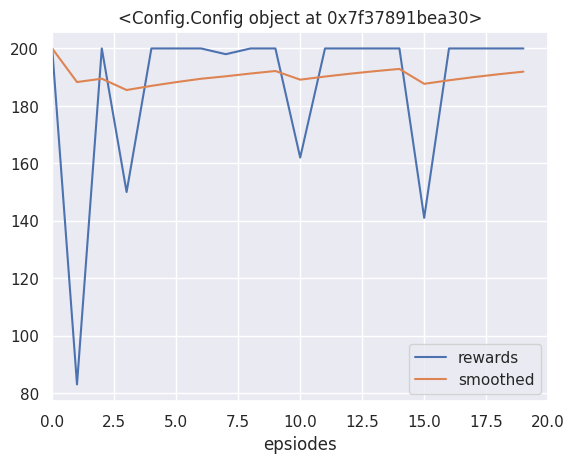

In [17]:
rewards = test(cfg, env, agent, interval_times=2, noise=True)
plot_rewards(rewards, cfg)
arr = np.array(rewards)
print(arr.mean(), arr.std())

tensor([[[[0.0031, 0.0026, 0.0026, 0.0039, 0.1478, 0.0026, 0.0031, 0.0267]]]])

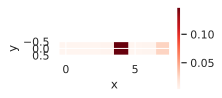

In [20]:
d2l.show_heatmaps(agent.policy_net.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
agent.policy_net.atten.view(1, 1, 1, 8).cpu()